# Emotion recognition with RMN

In [1]:
from rmn import *
from img_functions import *
import torch
from torchsummary import summary
from pytorch_grad_cam import GradCAM, GradCAMElementWise, GradCAMPlusPlus
from pytorch_grad_cam.utils.image import show_cam_on_image

c:\Users\terai\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load images
rgb_imgs = load_images()

# Build facial expression analysis model

The model used is ResNet18, with modified final layer, pre-trained on ImageNet.

In [3]:
predict = RMN()

# Display predictions for a single image
im_test = np.array(rgb_imgs[0])
emo_label, emo_proba, emo_list = predict.detect_emotion_for_single_face_image(face_image=im_test)
print("Emotion detected: ", emo_label, emo_proba)
print("Outputs: ",emo_list)

Emotion detected:  surprise 0.9982795715332031
Outputs:  [{'angry': 0.0001317080605076626}, {'disgust': 9.018337550514843e-06}, {'fear': 5.816407792735845e-05}, {'happy': 1.0156225471291691e-05}, {'sad': 0.0005224092165008187}, {'surprise': 0.9982795715332031}, {'neutral': 0.0009890062501654029}]


In [4]:
# Build emotion recognition model
model = get_emo_model()
# Print model architecture
# summary(model,input_size=(3,224,224))

# Apply Grad-CAM

In [9]:
def compute_gradcam(model, input_img, target_layers, targets=None) :

    im_p1 = cv2.resize(np.array(input_img),(224,224))
    im_p2 = im_p1 / np.max(im_p1)

    mean=[0., 0., 0.]
    std=[255, 255, 255]
    transform = transforms.Compose(transforms=[transforms.Resize(size=(224,224)),transforms.ToTensor()])
    input_tensor = transform(input_img.copy()).unsqueeze(0)

    with GradCAMPlusPlus(model=model, target_layers=target_layers) as cam :
        grayscale_cam = cam(input_tensor=input_tensor, targets=None)
        grayscale_cam = grayscale_cam[0, :]
        visualization = show_cam_on_image(img=im_p2, mask=grayscale_cam, use_rgb=True)

    return grayscale_cam, visualization

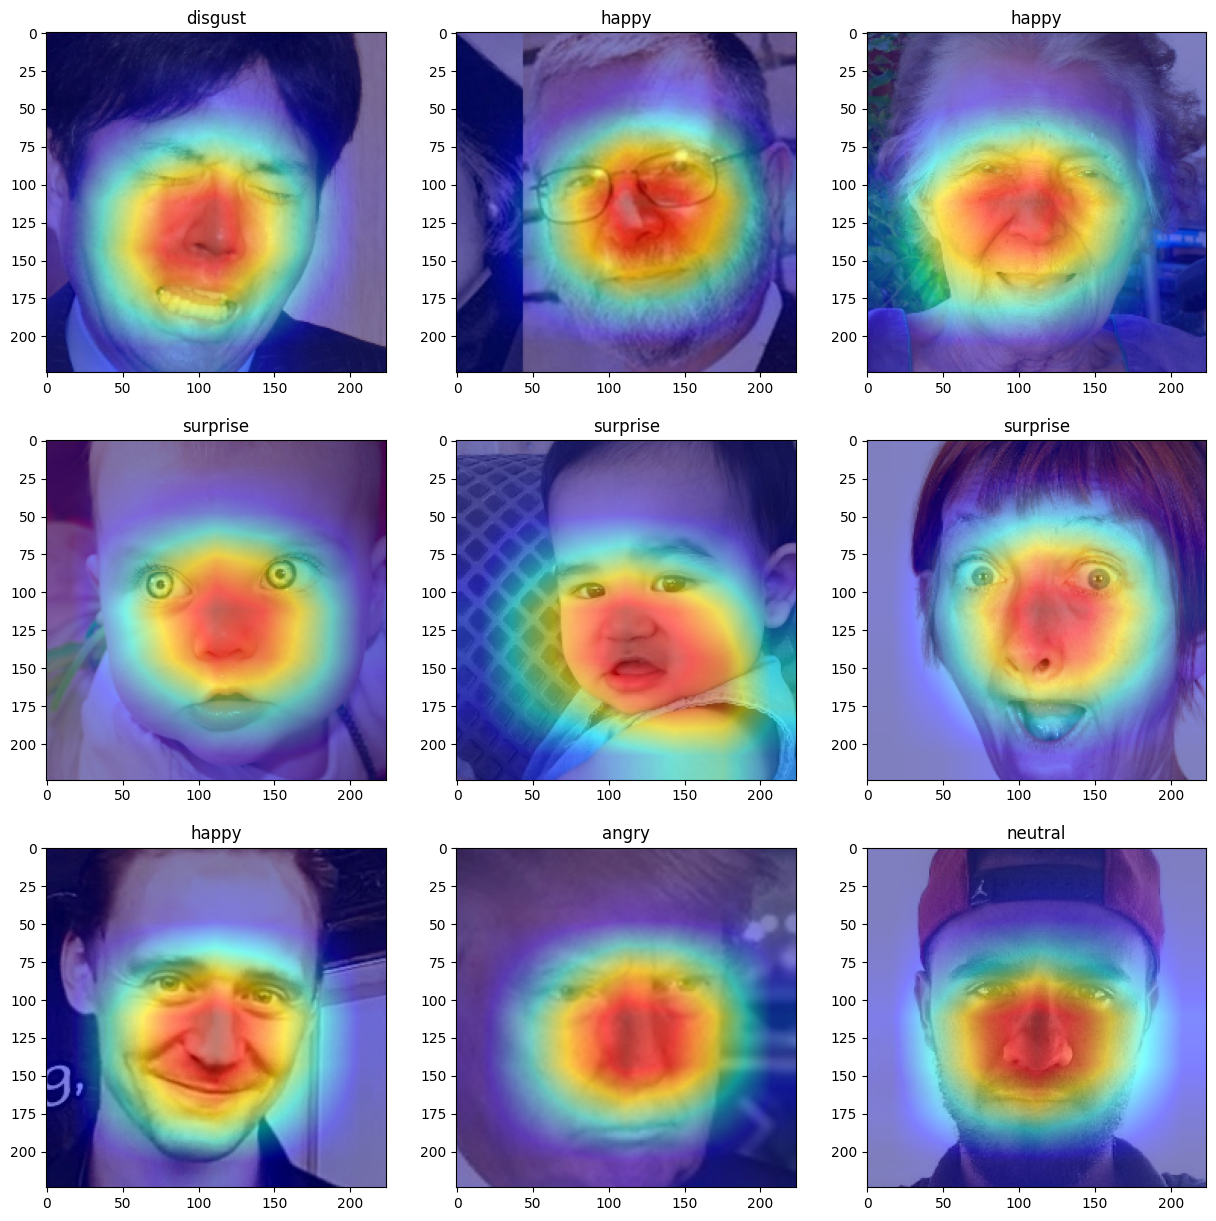

In [11]:
# Plot gradcam for ten images
target_layers = [model.layer4[-1].conv2]
nb_imgs = 9
plt.figure(figsize=(15,15))
for i in range(nb_imgs) :
    plt.subplot(3, 3, i + 1)
    res1, res2 = compute_gradcam(model, rgb_imgs[19+i], target_layers)
    emo_label, emo_proba, proba_list = predict.detect_emotion_for_single_face_image(face_image=np.array(rgb_imgs[19+i]))
    plt.title(emo_label)
    plt.imshow(res2)
plt.show()

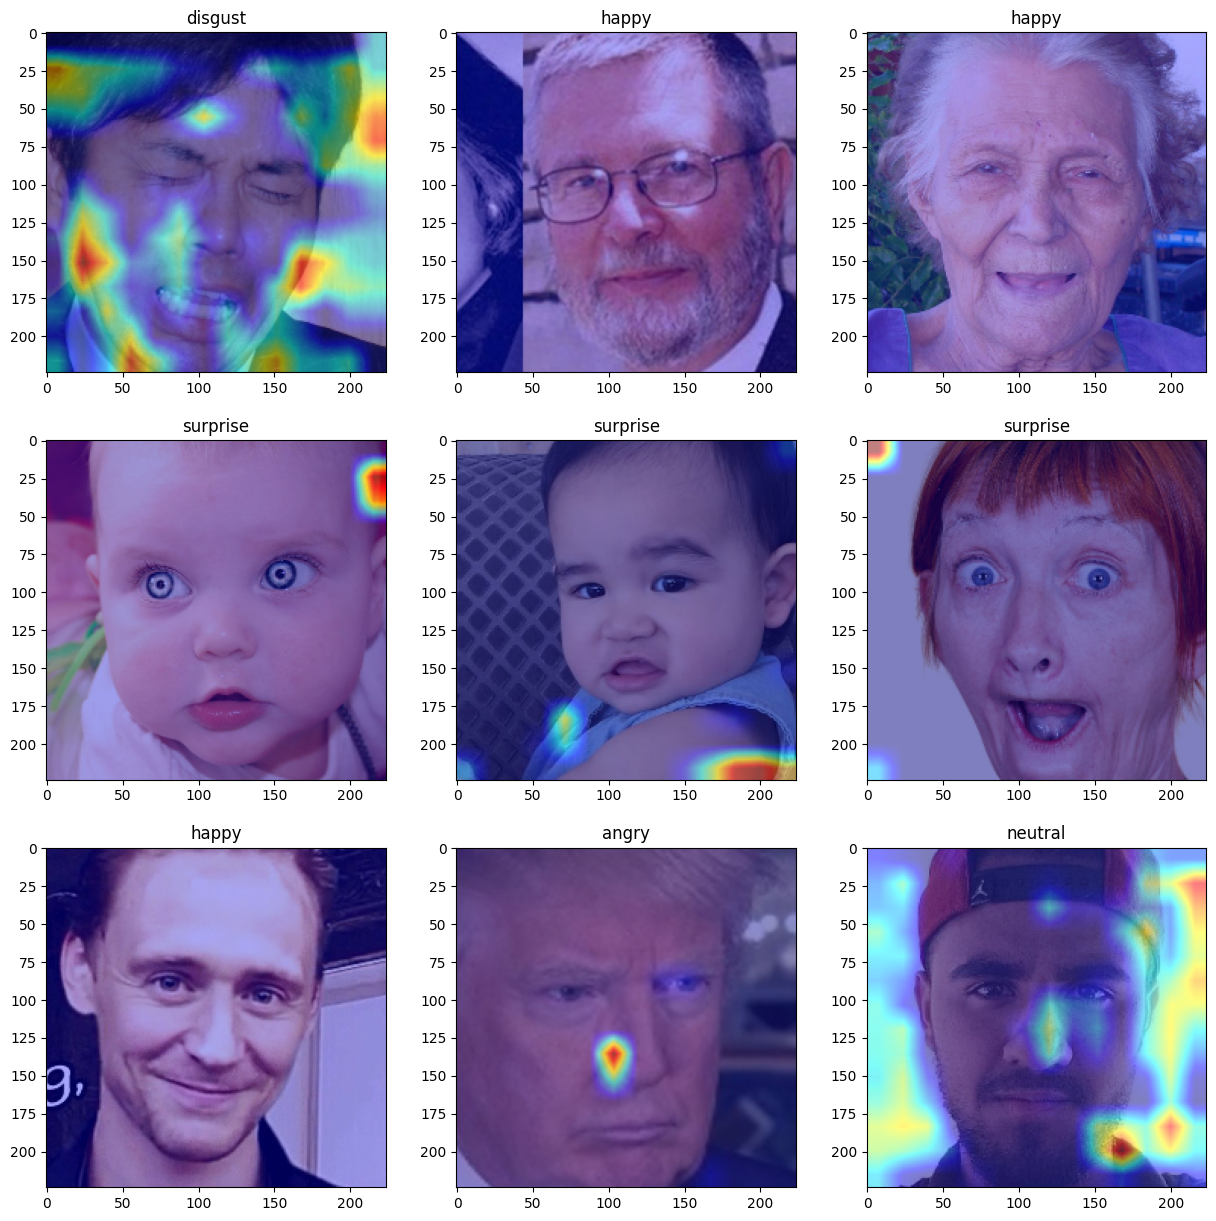

In [6]:
# Choose convolutional layers to compute gradients
target_layers = [model.layer3[2].conv2]

# Choose target category to compute GradCAM for
# targets = None -> default target category is highest scoring class

# Plot gradcam for ten images
nb_imgs = 9
plt.figure(figsize=(15,15))
for i in range(nb_imgs) :
    plt.subplot(3, 3, i + 1)
    res1, res2 = compute_gradcam(model, rgb_imgs[19+i], target_layers)
    emo_label, emo_proba, proba_list = predict.detect_emotion_for_single_face_image(face_image=np.array(rgb_imgs[19+i]))
    plt.title(emo_label)
    plt.imshow(res2)
plt.show()

## Feature maps

In [14]:
# Layer 4 conv2 
target_layer=model.layer4[2].conv2
